# Experiment 2 Analysis

Code to visualize results from Experiment 2, including text analysis.

In [1]:
import itertools
import string
import random

import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

import seaborn as sns
import matplotlib
import matplotlib.pylab as plt

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

hp = sns.cubehelix_palette(n_colors=4, rot=.5)
plot_palette = [hp[3], hp[1]]

## Learner Concept Knowledge

In [2]:
teacher_joined_survey = pd.read_csv("data/exp2_anonymized.csv")
teacher_joined_survey.rename(columns={"visibility":"Context"}, inplace=True)

final_level = teacher_joined_survey[teacher_joined_survey.level_number == 10]

/var/folders/gv/42lb0z1j4dxf3wsk74nrxwx80000gn/T/ipykernel_60622/3256865120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_level.sort_values(["comm_viz"], inplace=True)
/var/folders/gv/42lb0z1j4dxf3wsk74nrxwx80000gn/T/ipykernel_60622/3256865120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_level["size"] = 3000


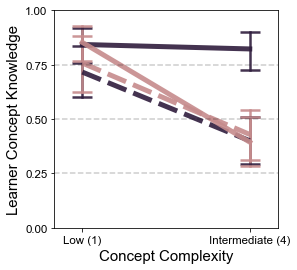

In [3]:
final_level.sort_values(["comm_viz"], inplace=True)

plt.figure(figsize=(4, 4))
final_level["size"] = 3000

ax = sns.lineplot(x="boolean_complexity", y="learner_concept", hue='communication', style='Context', data=final_level, 
                  err_style="bars", err_kws={"capsize": 10, "capthick": 2.5, "linewidth": 2.5}, ci=95, 
                  linewidth=5, alpha=.9, palette=plot_palette)

plt.ylabel("Learner Concept Knowledge")
plt.xlabel("Concept Complexity")

for x in [.25, .5, .75]:
    ax.axhline(x, alpha=.2, linestyle='--', c='k')
    
plt.yticks([0, .25, .5, .75, 1])
plt.ylim(0, 1)

ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(axis='both', which='major', labelsize=11.5)

plt.xticks([1, 4], labels=["Low (1)", "Intermediate (4)"])
plt.xlim(.5, 4.5)

plt.legend(prop={'size': 15, 'weight': 'bold'})
plt.gca().legend().remove()

In [4]:
final_level.groupby(["boolean_complexity", "communication", "Context"]).learner_concept.describe()

count      mean       std   min  \
boolean_complexity communication Context                                    
1                  chat          full      35.0  0.842857  0.252456  0.00   
                                 partial   33.0  0.715909  0.352548  0.00   
                   demo          full      39.0  0.852564  0.256289  0.25   
                                 partial   34.0  0.757353  0.386737  0.00   
4                  chat          full      38.0  0.822368  0.285683  0.00   
                                 partial   35.0  0.400000  0.326242  0.00   
                   demo          full      33.0  0.393939  0.341071  0.00   
                                 partial   37.0  0.429054  0.370974  0.00   

                                              25%    50%     75%  max  
boolean_complexity communication Context                               
1                  chat          full     0.62500  1.000  1.0000  1.0  
                                 partial  0.50000  1.000  1.0000  1.0  
                   demo          full     0.75000  1.000  1.0000  1.0  
                                 partial  0.56250  1.000  1.0000  1.0  
4                  chat          full     0.65625  1.000  1.0000  1.0  
                                 partial  0.12500  0.375  0.6875  1.0  
                   demo          full     0.12500  0.375  0.6250  1.0  
                                 partial  0.00000  0.375  0.7500  1.0

## Player Scores

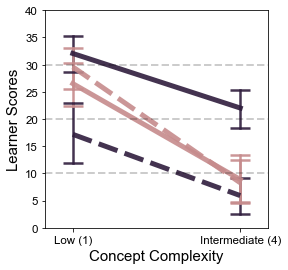

In [5]:
plt.figure(figsize=(4,4))

ax = sns.lineplot(data=final_level.sort_values(['Context', "communication", "boolean_complexity"], ascending=True), 
                  x="boolean_complexity", y='cum_player_score', 
                  hue='communication', style="Context", alpha=.9,
                  err_style="bars", err_kws={"capsize": 10, "capthick": 2.5, "linewidth": 2.5}, ci=95, 
                  linewidth=5, palette=plot_palette)

for score in [10, 20, 30]:
    plt.axhline(score, linestyle="--", c='k', alpha=.2, linewidth=2)

plt.ylabel("Learner Scores")
plt.xlabel("Concept Complexity")

ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(axis='both', which='major', labelsize=11.5)

plt.ylim(0, 40)
plt.xlim(0.5, 6.5)

plt.xticks([1, 4], labels=["Low (1)", "Intermediate (4)"])
plt.xlim(.5, 4.5)

plt.gca().legend().remove()
plt.show()


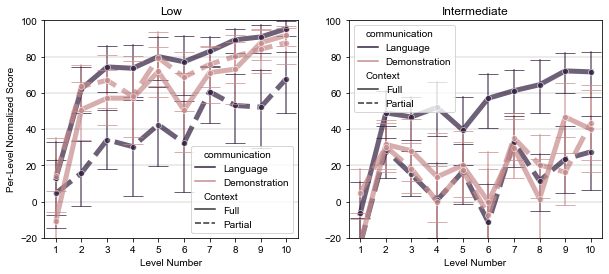

In [6]:
sorted_full = teacher_joined_survey.sort_values(['Context', "communication"], ascending=True)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plot_titles = ["Low", "Intermediate"]

sorted_full["communication"] = sorted_full.communication.apply(lambda x: "Language" if x == "chat" else "Demonstration")
sorted_full["Context"] = sorted_full.Context.apply(lambda x: "Full" if x == "full" else "Partial")


for ax, concept in zip(axs.reshape(-1), [1, 2]): 
    to_plot = sorted_full[sorted_full.concept_number == concept]

    sns.lineplot(data=to_plot, x='level_number', y="pct_max_score", hue='communication', style="Context", 
         sort=False, marker='o',
         err_style="bars", err_kws={"capsize": 10}, palette=plot_palette,
         ci=95, linewidth=5, alpha=.7, ax=ax)

    ax.set_title("{}".format(plot_titles[concept-1]))
    ax.set_ylabel("")
    ax.set_xlabel("Level Number")
        
    for x in [0, 20, 40, 60, 80]:
        ax.axhline(x, alpha=.1, c='k')
    ax.set_ylim(-20, 100)
    ax.set_xticks(range(1,11))
    
    axs.reshape(-1)[0].set_ylabel("Per-Level Normalized Score")

In [7]:
final_level.groupby(["boolean_complexity", "communication", "Context"]).cum_player_score.describe()

count       mean        std   min  \
boolean_complexity communication Context                                      
1                  chat          full      35.0  32.057143   9.761698   0.0   
                                 partial   33.0  17.181818  16.358206 -15.0   
                   demo          full      39.0  26.512821  12.828570  -2.0   
                                 partial   34.0  29.588235  12.458702   3.0   
4                  chat          full      38.0  22.026316  11.039210   3.0   
                                 partial   35.0   5.914286  10.207758 -14.0   
                   demo          full      33.0   8.878788  12.810537  -9.0   
                                 partial   37.0   8.270270  12.289672 -17.0   

                                           25%   50%   75%   max  
boolean_complexity communication Context                          
1                  chat          full     28.0  36.0  38.0  43.0  
                                 partial   5.0  25.0  29.0  43.0  
                   demo          full     20.5  33.0  36.0  41.0  
                                 partial  25.0  35.0  39.0  42.0  
4                  chat          full     13.0  21.0  31.5  40.0  
                                 partial  -2.0   5.0  10.0  31.0  
                   demo          full      1.0   7.0  11.0  42.0  
                                 partial  -1.0   5.0  18.0  37.0

## Subjective Difficulty

/var/folders/gv/42lb0z1j4dxf3wsk74nrxwx80000gn/T/ipykernel_60622/554452399.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  learner["player"] = "learner"


<Figure size 576x288 with 0 Axes>

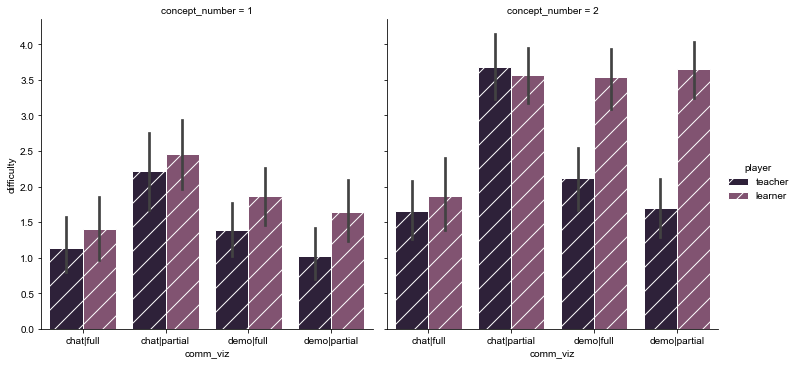

In [8]:
plt.figure(figsize=(8, 4))

teacher = final_level[["difficulty_teacher", "concept_number", "comm_viz"]]
teacher = teacher.rename(columns={"difficulty_teacher":"difficulty"})
learner = final_level[["difficulty", "concept_number", "comm_viz"]]
teacher["player"] = "teacher"
learner["player"] = "learner"

joined = pd.concat([teacher, learner])
joined.difficulty = 6 - joined.difficulty

linguistic_palette = [hp[3], hp[2]]
demo_palette = [hp[1], hp[0]]

ax = sns.catplot(data=joined, x="comm_viz", y="difficulty", hue="player", col="concept_number", 
                 hatch="/", edgecolor='w', 
                 palette=linguistic_palette,
#                  palette=demo_palette,
                 kind='bar')

In [9]:
joined.groupby(["concept_number", "comm_viz", "player"]).difficulty.describe()

count      mean       std  min  25%  50%  \
concept_number comm_viz     player                                              
1              chat|full    learner   35.0  1.400000  1.287953  0.0  0.0  1.0   
                            teacher   35.0  1.142857  1.216138  0.0  0.0  1.0   
               chat|partial learner   33.0  2.454545  1.501893  0.0  1.0  3.0   
                            teacher   33.0  2.212121  1.672528  0.0  1.0  2.0   
               demo|full    learner   39.0  1.871795  1.239259  0.0  1.0  2.0   
                            teacher   39.0  1.384615  1.161111  0.0  0.5  1.0   
               demo|partial learner   34.0  1.647059  1.299938  0.0  1.0  2.0   
                            teacher   34.0  1.029412  1.058452  0.0  0.0  1.0   
2              chat|full    learner   38.0  1.868421  1.579789  0.0  1.0  1.0   
                            teacher   38.0  1.657895  1.300235  0.0  1.0  1.5   
               chat|partial learner   35.0  3.571429  1.144956  1.0  3.0  4.0   
                            teacher   35.0  3.685714  1.450587  0.0  3.0  4.0   
               demo|full    learner   33.0  3.545455  1.325021  0.0  3.0  4.0   
                            teacher   33.0  2.121212  1.293193  0.0  2.0  2.0   
               demo|partial learner   37.0  3.648649  1.206837  0.0  3.0  4.0   
                            teacher   37.0  1.702703  1.288084  0.0  1.0  2.0   

                                      75%  max  
concept_number comm_viz     player              
1              chat|full    learner  2.00  5.0  
                            teacher  2.00  5.0  
               chat|partial learner  4.00  5.0  
                            teacher  4.00  5.0  
               demo|full    learner  3.00  5.0  
                            teacher  2.00  4.0  
               demo|partial learner  2.00  4.0  
                            teacher  2.00  4.0  
2              chat|full    learner  3.00  5.0  
                            teacher  2.75  5.0  
               chat|partial learner  4.50  5.0  
                            teacher  5.00  5.0  
               demo|full    learner  4.00  5.0  
                            teacher  3.00  5.0  
               demo|partial learner  5.00  5.0  
                            teacher  3.00  4.0

In [10]:
joined["group"] = joined.apply(lambda x: "{}|{}".format(x["comm_viz"], x["player"]), axis=1)
joined["group"] = joined.group.str.replace("chat", "lang")

In [11]:
export_to_r_cols = ["group", "difficulty", "concept_number"]

joined[export_to_r_cols].to_csv("data/exp2_survey_difficulty_for_r.csv")

# Behavioral Analysis

## Linguistic Teaching

In [12]:
chat_games = teacher_joined_survey[teacher_joined_survey.communication == "chat"]
chat_games.chat_text = chat_games.chat_text.apply(str)

chat_df_records = []
for k, g in chat_games.groupby("task_uuid"):
    chat_df_records.append({"task_uuid": str(k), "all_chat": g.chat_text.str.cat(sep="\n\t")})
    
cumulative_chat = pd.DataFrame.from_records(chat_df_records)
final_chat = chat_games[chat_games.level_number == 10].set_index("task_uuid").merge(cumulative_chat, on="task_uuid")

/var/folders/gv/42lb0z1j4dxf3wsk74nrxwx80000gn/T/ipykernel_60622/2560704370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chat_games.chat_text = chat_games.chat_text.apply(str)


Text(0.5, 0.98, 'Total Chat Characters by Context\n(partial context teachers sent more messages)')

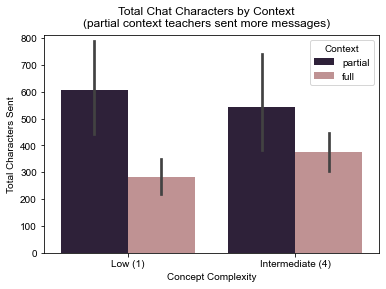

In [13]:
sns.barplot(data=final_chat, y="cum_teacher_chat", x="concept_number", hue="Context", 
            palette=plot_palette)

plt.ylabel("Total Characters Sent")
plt.xlabel("Concept Complexity")

plt.xticks([0, 1], labels=["Low (1)", "Intermediate (4)"])
plt.ylim(0, 810)
plt.suptitle("Total Chat Characters by Context\n(partial context teachers sent more messages)")

### Token / Bigram Statistics

In [14]:
def chat_blob_to_tokens(chat_blob, lemmatize=True, stopword_filter=True):
    
    # Remove punctuation
    chat_blob = chat_blob.replace("|", " ").lower()
    chat_blob = chat_blob.translate(str.maketrans('', '', string.punctuation))
    
    chat_tokens = nltk.word_tokenize(chat_blob)
    
    # Convert single-digit numerals to words, i.e. "0" --> "zero"
    number_map = {"0":"zero","1":"one","2":"two","3":"three", 
                "4": "four","5":"five", "6": "six", "7":"seven", "8":"eight", "9":"nine"}

    chat_tokens = [number_map.get(t, t) for t in chat_tokens]

    return chat_tokens
    
def filter_and_lemmatize(chat_tokens):
    
    # Stem or lemmaize the words
    chat_tokens = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in chat_tokens]
    
    all_stopwords = stopwords.words("english")
    
    chat_tokens = [t for t in chat_tokens if t not in all_stopwords]
        
    return chat_tokens

In [15]:
final_chat["tokens"] = final_chat.apply(lambda x: filter_and_lemmatize(chat_blob_to_tokens(x["all_chat"])), axis=1)

In [16]:
token_count_df_list = []
for k, g in final_chat.groupby("comm_viz"):
    
    all_tokens = pd.Series(itertools.chain.from_iterable(g.tokens))
    token_count_df = pd.DataFrame(all_tokens.value_counts()).reset_index()
    token_count_df = token_count_df.rename(columns={"index": "word", 0: "word_count"})
    token_count_df["comm_viz"] = k
    token_count_df["percent"] = 100 * token_count_df["word_count"] / token_count_df["word_count"].sum()
    token_count_df_list.append(token_count_df)
    
language_df = pd.concat(token_count_df_list)

In [17]:
full_chat = language_df[language_df["comm_viz"].str.contains("full")]
full_chat.loc[:, "cum_percent"] = full_chat.percent.cumsum()
full_chat.sort_values("percent", ascending=False)[:10]

/var/folders/gv/42lb0z1j4dxf3wsk74nrxwx80000gn/T/ipykernel_60622/3974903508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_chat.loc[:, "cum_percent"] = full_chat.percent.cumsum()


,word,word_count,comm_viz,percent,cum_percent
0,triangle,146,chat|full,5.005142,5.005142
1,good,145,chat|full,4.970860,9.976003
2,square,138,chat|full,4.730888,14.706891
3,pink,105,chat|full,3.599589,18.306479
4,job,94,chat|full,3.222489,21.528968
5,great,93,chat|full,3.188207,24.717175
6,blue,91,chat|full,3.119643,27.836819
7,one,71,chat|full,2.434008,30.270826
8,filled,64,chat|full,2.194035,32.464861
9,positive,63,chat|full,2.159753,34.624614


In [18]:
partial_chat = language_df[language_df["comm_viz"].str.contains("partial")]
partial_chat.loc[:, "cum_percent"] = full_chat.percent.cumsum()
partial_chat.sort_values("percent", ascending=False)[:10]

/var/folders/gv/42lb0z1j4dxf3wsk74nrxwx80000gn/T/ipykernel_60622/282037560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_chat.loc[:, "cum_percent"] = full_chat.percent.cumsum()


,word,word_count,comm_viz,percent,cum_percent
0,one,279,chat|partial,6.204136,5.005142
1,right,268,chat|partial,5.959529,9.976003
2,left,251,chat|partial,5.581499,14.706891
3,bottom,246,chat|partial,5.470314,18.306479
4,positive,244,chat|partial,5.425839,21.528968
5,top,227,chat|partial,5.047810,24.717175
6,corner,183,chat|partial,4.069380,27.836819
7,negative,172,chat|partial,3.824772,30.270826
8,wa,127,chat|partial,2.824105,32.464861
9,good,97,chat|partial,2.156994,34.624614


In [19]:
final_chat["bigrams"] = final_chat.apply(lambda x: nltk.bigrams(filter_and_lemmatize(chat_blob_to_tokens(x["all_chat"]))), axis=1)

bigram_df_list = []
for k, g in final_chat.groupby("comm_viz"):
    
    all_bigrams = pd.Series(itertools.chain.from_iterable(g.bigrams))
    bigram_count_df = pd.DataFrame(all_bigrams.value_counts()).reset_index()
    bigram_count_df = bigram_count_df.rename(columns={"index": "bigram", 0: "bigram_count"})
    bigram_count_df["condition"] = k
    bigram_count_df["percent"] = 100 * bigram_count_df["bigram_count"] / bigram_count_df["bigram_count"].sum()
    bigram_df_list.append(bigram_count_df)

bigram_df = pd.concat(bigram_df_list)

partial_bigrams = bigram_df[bigram_df.condition.str.contains("partial")]
partial_bigrams.sort_values("bigram_count", ascending=False).head(10)

,bigram,bigram_count,condition,percent
0,"(bottom, left)",130,chat|partial,2.935200
1,"(top, right)",122,chat|partial,2.754572
2,"(bottom, right)",96,chat|partial,2.167532
3,"(top, left)",80,chat|partial,1.806277
4,"(left, corner)",49,chat|partial,1.106345
5,"(right, corner)",46,chat|partial,1.038609
6,"(positive, bottom)",40,chat|partial,0.903138
7,"(right, positive)",33,chat|partial,0.745089
8,"(good, job)",31,chat|partial,0.699932
9,"(corner, positive)",29,chat|partial,0.654775


In [20]:
full_bigrams = bigram_df[bigram_df.condition.str.contains("full")]
full_bigrams.sort_values("bigram_count", ascending=False).head(10)

,bigram,bigram_count,condition,percent
0,"(good, job)",47,chat|full,1.652602
1,"(well, done)",42,chat|full,1.476793
2,"(great, job)",32,chat|full,1.125176
3,"(empty, triangle)",30,chat|full,1.054852
4,"(nan, nan)",24,chat|full,0.843882
5,"(blue, square)",24,chat|full,0.843882
6,"(keep, going)",22,chat|full,0.773558
7,"(pink, triangle)",21,chat|full,0.738397
8,"(triangle, square)",20,chat|full,0.703235
9,"(triangle, positive)",18,chat|full,0.632911


### Word Clouds

In [21]:
colors = [(0, 0, 0), (0, 0, 0)]  # R -> G -> B
cmap_name = 'my_list'
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

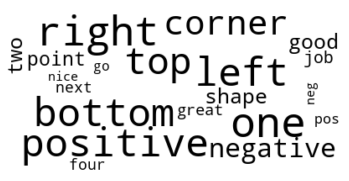

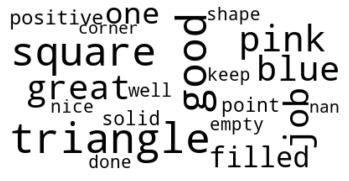

In [22]:
wc_dict = {}
for k, g in final_chat.groupby("comm_viz"):
    
    all_tokens = list(itertools.chain.from_iterable(g.apply(lambda x: chat_blob_to_tokens(x["all_chat"]), axis=1)))
    random.shuffle(all_tokens)
    string_blob = " ".join(all_tokens)
    wc_dict[k] = WordCloud(max_words=20, max_font_size=50, min_font_size=10, background_color='white', colormap=cmap).generate(string_blob)

plt.figure()
plt.axis("off")
plt.imshow(wc_dict["chat|partial"], interpolation='bilinear')

plt.figure()
plt.axis("off")
plt.imshow(wc_dict["chat|full"],  interpolation='bilinear')

### Raw Chat Text

In [23]:
for k, games in chat_games.groupby("task_uuid"):

        games = games.sort_values(by='level_number')
        print("\nContext: {}, Complexity: {}\nCumulative Score: {}".format(games.iloc[0]["Context"], games.iloc[0]["boolean_complexity"], games.iloc[-1]["cum_player_score"]))
        print("{}".format(k))
        for gid, g in games.iterrows():
            print("Score {} --> \"{}\"".format(g.player_score, g.chat_text.replace("|", " ")))


Context: partial, Complexity: 1
Cumulative Score: 31
W01ae36fc0b
Score -3 --> "everything you collected was negative. the top left had all positive, except the top second from the left item. the bottom left was all positive except what was in the far bottom left corner "
Score 1 --> "okay this time everything in the bottom right corner was positive, so try going for shapes/colors that look like that. avoid the shapes/colors that were in the bottom left, those were all negative "
Score 3 --> "good job! this time in the bottom left there was only one negative in the very left bottom corner. hope that helps! "
Score 4 --> "it seems like you have the hang of this, but just to make sure, everything in the bottom left was negative and there is one negative below you right now "
Score 5 --> "nice :) again everything in the bottom left was negative "
Score 3 --> "you got it down "
Score 4 --> "nice! "
Score 4 --> "nice again "
Score 5 --> "nice "
Score 5 --> "awesome! thanks for the money "



In [24]:
print("Manually identified \"bad\" teachers:")

for k, games in chat_games.groupby("task_uuid"):
    
    if np.all(games.bad_teacher):

        games = games.sort_values(by='level_number')
        print("\nContext: {}, Complexity: {}\nCumulative Score: {}".format(games.iloc[0]["Context"], games.iloc[0]["boolean_complexity"], games.iloc[-1]["cum_player_score"]))
        print("{}".format(k))
        for gid, g in games.iterrows():
            print("Score {} --> \"{}\"".format(g.player_score, g.chat_text.replace("|", " ")))

Manually identified "bad" teachers:

Context: partial, Complexity: 1
Cumulative Score: -5
W0879209af6
Score 0 --> "Good try."
Score 3 --> "Good start  "
Score 0 --> "Good try"
Score 1 --> "You are doing great!"
Score -5 --> "Oops, wrong direction."
Score 0 --> "Better luck next time."
Score -2 --> "Oops, you're still great!"
Score -1 --> "We  We'll get 'em next time."
Score -2 --> "We will do better next time."
Score 1 --> "Good start."

Context: partial, Complexity: 4
Cumulative Score: 1
W17ebc17981
Score 0 --> "green top green bottom "
Score 0 --> "nan"
Score -1 --> "nan"
Score -3 --> "nan"
Score -3 --> "change colour it needs to be green ones "
Score 0 --> " "
Score 2 --> "perfect "
Score 2 --> "well done  "
Score 2 --> "nan"
Score 2 --> "great "

Context: partial, Complexity: 4
Cumulative Score: 17
W3a7310a128
Score -3 --> "Nice try"
Score 2 --> "You are doing great"
Score 2 --> "nan"
Score 2 --> "Doing great!"
Score 2 --> "nan"
Score 1 --> "nan"
Score 3 --> "Great score!!!!"
Score

## Demonstrative Teaching

In [25]:
import json
demos_to_analyze = pd.read_csv("data/exp2_demonstrations.csv")

demos_to_analyze.game = demos_to_analyze.game.apply(lambda x: json.loads(x.replace("\'", "\"")))

# Visualize individual level

In [26]:
def plot_control(object_list, **kwargs):
    return plot_object_layout(object_list, ['r', 'w', 'g'], 
                              positive_shape="s", label_values="true_value", plot_fake_colors=False, max_obj_value=1,
                              **kwargs)

def plot_object_layout(original_object_list, object_colormap, positive_shape='o', negative_shape='s', zero_shape=None, 
                       color_magnitude=False, plot_x=5, plot_y=5, title="", label_values=None, max_obj_value=10, plot_fake_colors=True, ax=None):    

    object_list = copy.deepcopy(original_object_list)
    
    for o in object_list:
        o["true_value"] = o.get('value')

    objects_df = pd.DataFrame(object_list)
    
    if ax is None:
        plt.figure(figsize=(plot_x, plot_y))
        ax = plt.gca()
    
    ax.set_facecolor('w')
    ax.scatter(objects_df.x, objects_df.y, s=400, 
               marker='s', color=(.6, .6, .6), edgecolors='white', linewidths=1)
    
    if label_values:
        neg_objects = objects_df[objects_df.true_value < 0]
        for index, row in neg_objects.iterrows():
            ax.text(row["x"]-1, row["y"]+.75, 
                    int(row[label_values]), 
                    weight='bold', c=(1,.2,.2))
            
        pos_objects = objects_df[objects_df.true_value > 0]
        for index, row in pos_objects.iterrows():
            ax.text(row["x"]-1, row["y"]+.75, 
                    int(row[label_values]), 
                    weight='bold', c=(.2,1,.2))
                
    ax.set_xlim(0, 75)
    ax.set_ylim(75,0)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)
    ax.axis("off")


In [27]:
def get_viz_string(object_dict, class_features):
    
    pos_features = set(class_features[1])
    neg_features = set(class_features[-1])
    
    return class_features[object_dict["value"]][object_dict["mask_value"]]

def update_object_with_mask(object_dict, class_features):
    
    string = get_viz_string(object_dict, class_features)
    
    color = 'm' if string[0] == '1' else 'c'
    shape = '^' if string[1] == '1' else 's'
    hollow = True if string[2] == '1' else False
    
    object_dict.update({"color": color, "shape": shape, "hollow": hollow})
    
    return object_dict


def plot_boolean_colors(original_object_list, class_features,
                        plot_x=5, plot_y=5, title="", label_values=False, ax=None):    

    if ax is None:
        ax = plt.figure(figsize=(plot_x, plot_y)).gca()
    
    object_list = copy.deepcopy(original_object_list)
    object_list = [update_object_with_mask(o, class_features) for o in object_list]
    objects_df = pd.DataFrame(object_list)
    
    ax.set_facecolor('w')
        
    for s, df in objects_df[objects_df.hollow == False].groupby("shape"):
        ax.scatter(df.x, df.y, s=400, 
                    marker=s,
                    color=df.color.values)
    
    for s, df in objects_df[objects_df.hollow == True].groupby("shape"):
        ax.scatter(df.x, df.y, s=400, marker=s,
                   edgecolors=df.color.values,
                   facecolors='none',
                  linewidths=4)
                
    ax.set_xlim(0, 75)
    ax.set_ylim(75,0)
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_title(title)
    ax.axis("off")

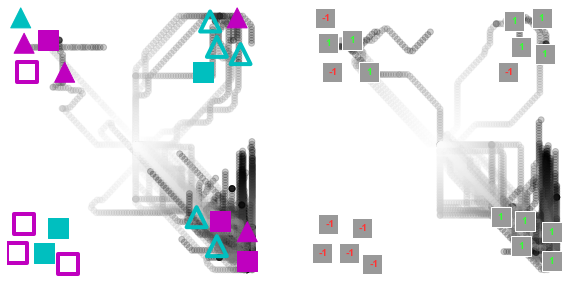

In [28]:
import copy

level_to_plot = 2
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

CLASS_TWO_FEATURES = {
    1: [ "011", "100", "001", "110"],
    -1:["000",  "111", "010",  "101"]}

ALL_FEATURES = set(''.join(s) for s in itertools.product('01', repeat=3))

for ax, viz in zip(axs.reshape(-1), ["full", "partial"]):
    
    all_games_on_level = demos_to_analyze[demos_to_analyze.level_number == level_to_plot]
    
    matched = all_games_on_level.apply(lambda x: x.game["task_configuration"]["visibility"] == viz, axis=1)
    viz_matched_games = all_games_on_level[matched]
    
    for g in viz_matched_games.game:
        trajectory = g['player_locations']
        ts = [t[0] for t in trajectory]
        x = [t[1] for t in trajectory]
        y = [t[2] for t in trajectory]

        ax.scatter(x, y, c=ts, cmap='Greys', alpha=.2)
        plt.gca().set_title(viz)
    
    if viz == 'partial':
        plot_control(viz_matched_games.game.iloc[0]["config"]["frame_data"]["objects"], ax=ax)
    else:
        plot_boolean_colors(viz_matched_games.game.iloc[0]["config"]['frame_data']['objects'], class_features=CLASS_TWO_FEATURES, ax=ax)